In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Import our data into pandas from CSV
filepath1 = "Datasets/Olympic_Athlete_Event_Details.csv"
filepath2 = "Datasets/Country_Profiles_Clean.csv"
filepath3 = "Datasets/Olympic_Event_Results.csv"
filepath4 = "Datasets/Olympic_Games_Summary.csv"
filepath5 = "Datasets/Olympic_Medal_Tally_History.csv"

df_Athlete_Event_Details = pd.read_csv(filepath1)
df_Country_Profiles = pd.read_csv(filepath2)
df_Event_Results = pd.read_csv(filepath3)
df_Games_Summary = pd.read_csv(filepath4)
df_Medal_Tally_History = pd.read_csv(filepath5)

In [3]:
df_Country_Profiles.info()
df_Country_Profiles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   noc      235 non-null    object
 1   country  235 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


,noc,country
0,AFG,Afghanistan
1,ALB,Albania
2,ALG,Algeria
3,ASA,American Samoa
4,AND,Andorra


In [4]:
df_Country_Profiles.rename(columns={'noc': 'country_noc'}, inplace=True)

In [5]:
df_Athlete_Event_Details.info()
df_Athlete_Event_Details.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316834 entries, 0 to 316833
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   edition      316834 non-null  object
 1   edition_id   316834 non-null  int64 
 2   country_noc  316834 non-null  object
 3   sport        316834 non-null  object
 4   event        316834 non-null  object
 5   result_id    316834 non-null  int64 
 6   athlete      316834 non-null  object
 7   athlete_id   316834 non-null  int64 
 8   pos          316834 non-null  object
 9   medal        44687 non-null   object
 10  isTeamSport  316834 non-null  bool  
dtypes: bool(1), int64(3), object(7)
memory usage: 24.5+ MB


,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,NaN,False
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,NaN,False
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,NaN,False
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,NaN,False
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,NaN,False


In [14]:
#Clean up the athlete event details tab to collapse all of the teams sports into one athlete
# Filter out individual rows for team sports
non_team_sports = df_Athlete_Event_Details[~df_Athlete_Event_Details['isTeamSport']]
team_sports_grouped = (
    df_Athlete_Event_Details[df_Athlete_Event_Details['isTeamSport']]
    .groupby(['edition', 'country_noc', 'sport', 'event'], as_index=False)
    .agg({
        'athlete': lambda x: ', '.join(x),  # Combine athlete names into one string
        'pos': 'first',                     # Keep position (or change aggregation logic as needed)
        'medal': 'first',                   # Assume medals are the same for team members
        'isTeamSport': 'first'              # Keep the isTeamSport value
    })
)

# Combine the grouped team sports with non-team sports
athlete_results_clean = pd.concat([team_sports_grouped, non_team_sports], ignore_index=True).reset_index(drop = True)

# Display the result
athlete_results_clean.head()

,edition,country_noc,sport,event,athlete,pos,medal,isTeamSport,edition_id,result_id,athlete_id
0,1896 Summer Olympics,AUS,Tennis,"Doubles, Men","Teddy Flack, George Stuart Robertson",3,Bronze,True,NaN,NaN,NaN
1,1896 Summer Olympics,FRA,Tennis,"Doubles, Men","J. Defert, André Vacherot",DNS,None,True,NaN,NaN,NaN
2,1896 Summer Olympics,GBR,Tennis,"Doubles, Men","John Pius Boland, Fritz Traun, Teddy Flack, Ge...",1,Gold,True,NaN,NaN,NaN
3,1896 Summer Olympics,GER,Artistic Gymnastics,"Horizontal Bar, Teams, Men","Carl Schuhmann, Conrad Böcker, Alfred Flatow, ...",1,Gold,True,NaN,NaN,NaN
4,1896 Summer Olympics,GER,Artistic Gymnastics,"Parallel Bars, Teams, Men","Conrad Böcker, Alfred Flatow, Gustav Flatow, G...",1,Gold,True,NaN,NaN,NaN


In [6]:
df_Event_Results.info()
df_Event_Results.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   result_id            7394 non-null   int64 
 1   event_title          7394 non-null   object
 2   edition              7394 non-null   object
 3   edition_id           7394 non-null   int64 
 4   sport                7394 non-null   object
 5   sport_url            7394 non-null   object
 6   result_date          7394 non-null   object
 7   result_location      7393 non-null   object
 8   result_participants  7394 non-null   object
 9   result_format        7394 non-null   object
 10  result_detail        7394 non-null   object
 11  result_description   7394 non-null   object
dtypes: int64(2), object(10)
memory usage: 693.3+ KB


,result_id,event_title,edition,edition_id,sport,sport_url,result_date,result_location,result_participants,result_format,result_detail,result_description
0,30359,"Super-Heavyweight (>105 kilograms), Men",2004 Summer Olympics,26,Weightlifting,/editions/26/sports/WLF,"25 August 2004 — 16:30 (B), 20:00 (A)","Olympiako Gymnastirio Arsis Varon Nikaias, Nikaia",17 from 15 countries,Total of best lifts in snatch and clean & jerk...,na,"Not so much a competition as a coronation, the..."
1,1626,"Giant Slalom, Women1",1998 Winter Olympics,46,Snowboarding,/editions/46/sports/SBD,9 February 1998,"Mt. Yakebitai, Shiga Kogen, Yamanouchi",31 from 14 countries,"Two runs, total time determined placement.",Gates: 38 / 36Length: 936 mStart Altitude: 196...,The women’s giant slalom was postponed one day...
2,76,"Singles, Men",1976 Winter Olympics,40,Luge,/editions/40/sports/LUG,4 – 7 February 1976,"Kunsteis-Bob- und Rodelbahn, Igls",43 from 15 countries,"Four runs, total time determined placement.",Curves: 14Length: 1220 mStart Altitude: ?Verti...,"Once more, the competitors from East and West ..."
3,962,"1,500 metres, Men",1928 Winter Olympics,30,Speed Skating,/editions/30/sports/SSK,14 February 1928 — 9:00,"Olympia-Eisstadion Badrutts Park, St. Moritz",30 from 14 countries,na,na,There was little doubt that the Olympic 1500 m...
4,258824,"Canadian Singles, Slalom, Men",2008 Summer Olympics,53,Canoe Slalom,/editions/53/sports/CSL,11 – 12 August 2008,"Shunyi Aolinpike Shuishang Gongyuan, Mapo, Shunyi",16 from 16 countries,na,na,Two former Olympic champions in the C-1 slalom...


In [7]:
df_Games_Summary.info()
df_Games_Summary.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   edition           64 non-null     object
 1   edition_id        64 non-null     int64 
 2   edition_url       64 non-null     object
 3   year              64 non-null     int64 
 4   city              64 non-null     object
 5   country_flag_url  64 non-null     object
 6   country_noc       64 non-null     object
 7   start_date        55 non-null     object
 8   end_date          54 non-null     object
 9   competition_date  64 non-null     object
 10  isHeld            5 non-null      object
dtypes: int64(2), object(9)
memory usage: 5.6+ KB


,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isHeld
0,1896 Summer Olympics,1,/editions/1,1896,Athina,https://olympedia-flags.s3.eu-central-1.amazon...,GRE,6 April,15 April,6 – 13 April,NaN
1,1900 Summer Olympics,2,/editions/2,1900,Paris,https://olympedia-flags.s3.eu-central-1.amazon...,FRA,NaN,NaN,14 May – 28 October,NaN
2,1904 Summer Olympics,3,/editions/3,1904,St. Louis,https://olympedia-flags.s3.eu-central-1.amazon...,USA,14 May,NaN,1 July – 26 November,NaN
3,1908 Summer Olympics,5,/editions/5,1908,London,https://olympedia-flags.s3.eu-central-1.amazon...,GBR,13 July,25 July,27 April – 31 October,NaN
4,1912 Summer Olympics,6,/editions/6,1912,Stockholm,https://olympedia-flags.s3.eu-central-1.amazon...,SWE,6 July,15 July,5 May – 27 July,NaN


In [8]:
df_Medal_Tally_History.info()
df_Medal_Tally_History.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   edition      1807 non-null   object
 1   edition_id   1807 non-null   int64 
 2   year         1807 non-null   int64 
 3   country      1807 non-null   object
 4   country_noc  1807 non-null   object
 5   gold         1807 non-null   int64 
 6   silver       1807 non-null   int64 
 7   bronze       1807 non-null   int64 
 8   total        1807 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 127.2+ KB


,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7


In [15]:
# Want to look at country success by event type
athlete_results_clean["Bronze_ct"] = athlete_results_clean["medal"].map({'Bronze': 1}).fillna(0)
athlete_results_clean["Silver_ct"] = athlete_results_clean["medal"].map({'Silver': 1}).fillna(0)
athlete_results_clean["Gold_ct"] = athlete_results_clean["medal"].map({'Gold': 1}).fillna(0)
athlete_results_clean["Weighted Medals"] = athlete_results_clean["medal"].map({'Gold': 3, 'Silver': 2, 'Bronze': 1, '': 0}).fillna(0)
athlete_results_clean["Gender"] = athlete_results_clean["event"].str.extract(r'(Men|Women)', expand=False)
athlete_results_clean.head()

,edition,country_noc,sport,event,athlete,pos,medal,isTeamSport,edition_id,result_id,athlete_id,Bronze_ct,Silver_ct,Gold_ct,Weighted Medals,Gender
0,1896 Summer Olympics,AUS,Tennis,"Doubles, Men","Teddy Flack, George Stuart Robertson",3,Bronze,True,NaN,NaN,NaN,1.0,0.0,0.0,1.0,Men
1,1896 Summer Olympics,FRA,Tennis,"Doubles, Men","J. Defert, André Vacherot",DNS,None,True,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Men
2,1896 Summer Olympics,GBR,Tennis,"Doubles, Men","John Pius Boland, Fritz Traun, Teddy Flack, Ge...",1,Gold,True,NaN,NaN,NaN,0.0,0.0,1.0,3.0,Men
3,1896 Summer Olympics,GER,Artistic Gymnastics,"Horizontal Bar, Teams, Men","Carl Schuhmann, Conrad Böcker, Alfred Flatow, ...",1,Gold,True,NaN,NaN,NaN,0.0,0.0,1.0,3.0,Men
4,1896 Summer Olympics,GER,Artistic Gymnastics,"Parallel Bars, Teams, Men","Conrad Böcker, Alfred Flatow, Gustav Flatow, G...",1,Gold,True,NaN,NaN,NaN,0.0,0.0,1.0,3.0,Men


In [16]:
#make a new dataframe with just sport, country, and results
df_country_results = pd.DataFrame({
    'country_noc':athlete_results_clean['country_noc'],
    'sport':athlete_results_clean['sport'],
    'weighted_results':athlete_results_clean['Weighted Medals'],
    'gold':athlete_results_clean["Gold_ct"],
    'silver':athlete_results_clean["Silver_ct"],
    'bronze':athlete_results_clean["Bronze_ct"],
})

df_country_results = pd.merge(df_country_results, df_Country_Profiles, on='country_noc', how='left')
df_country_results.head()

,country_noc,sport,weighted_results,gold,silver,bronze,country
0,AUS,Tennis,1.0,0.0,0.0,1.0,Australia
1,FRA,Tennis,0.0,0.0,0.0,0.0,France
2,GBR,Tennis,3.0,1.0,0.0,0.0,Great Britain
3,GER,Artistic Gymnastics,3.0,1.0,0.0,0.0,Germany
4,GER,Artistic Gymnastics,3.0,1.0,0.0,0.0,Germany


In [21]:
#group the results by country and sport and then drop any results where the country has not won much.
df_sport_country_sum = df_country_results.groupby(['country', 'sport'], as_index=False)['weighted_results'].sum()
df_sport_country_sum = df_sport_country_sum[df_sport_country_sum['weighted_results'] > 2].dropna().reset_index(drop = True)
print(df_sport_country_sum)

         country         sport  weighted_results
0        Algeria     Athletics              20.0
1        Algeria        Boxing               8.0
2        Algeria          Judo               3.0
3      Argentina     Athletics              12.0
4      Argentina    Basketball               4.0
...          ...           ...               ...
1196  Yugoslavia  Table Tennis               3.0
1197  Yugoslavia    Water Polo              17.0
1198  Yugoslavia     Wrestling              30.0
1199    Zimbabwe        Hockey               3.0
1200    Zimbabwe      Swimming              15.0

[1201 rows x 3 columns]


In [22]:
#Rugby Sevens, Diving, Football, Baseball, Hockey, Artistic Gymnastics

In [ ]:
#Thank you ChatGPT!
sports =df_sport_country_sum['sport'].unique()
# Set Canvas Size for multiple subplots
fig, axes = plt.subplots(len(sports), 1, figsize=(12, 6 * len(sports)))

# If there's only one sport, axes will not be a list, so handle that
if len(sports) == 1:
    axes = [axes]

# Counter for valid plots
plot_index = 0

# Loop over each sport and plot on a different axis
for sport in sports:
    sport_data = df_sport_country_sum[df_sport_country_sum['sport'] == sport]
    
    # Filter sports with more than 5 unique countries
    if sport_data['country'].nunique() > 5:
        # Select the top 6 countries based on 'weighted_results'
        top_6_countries = sport_data.nlargest(6, 'weighted_results')
        
        # Create a bar chart for the top 6 countries
        axes[plot_index].bar(top_6_countries['country'], 
                             top_6_countries['weighted_results'], 
                             color='teal', 
                             edgecolor='black')
        
        # Customizations for each subplot
        axes[plot_index].set_xlabel("Country", fontfamily="Arial", fontsize=12)
        axes[plot_index].set_ylabel("Total Weighted Results", fontfamily="Arial", fontsize=12)
        axes[plot_index].set_title(f"Top 6 Countries in {sport} (Total Weighted Results)", 
                                   fontweight="bold", fontsize=16, fontfamily="Arial")
        axes[plot_index].grid(axis='y', linestyle="-", color="lightgrey", alpha=0.75)
        
        # Increment the plot index
        plot_index += 1

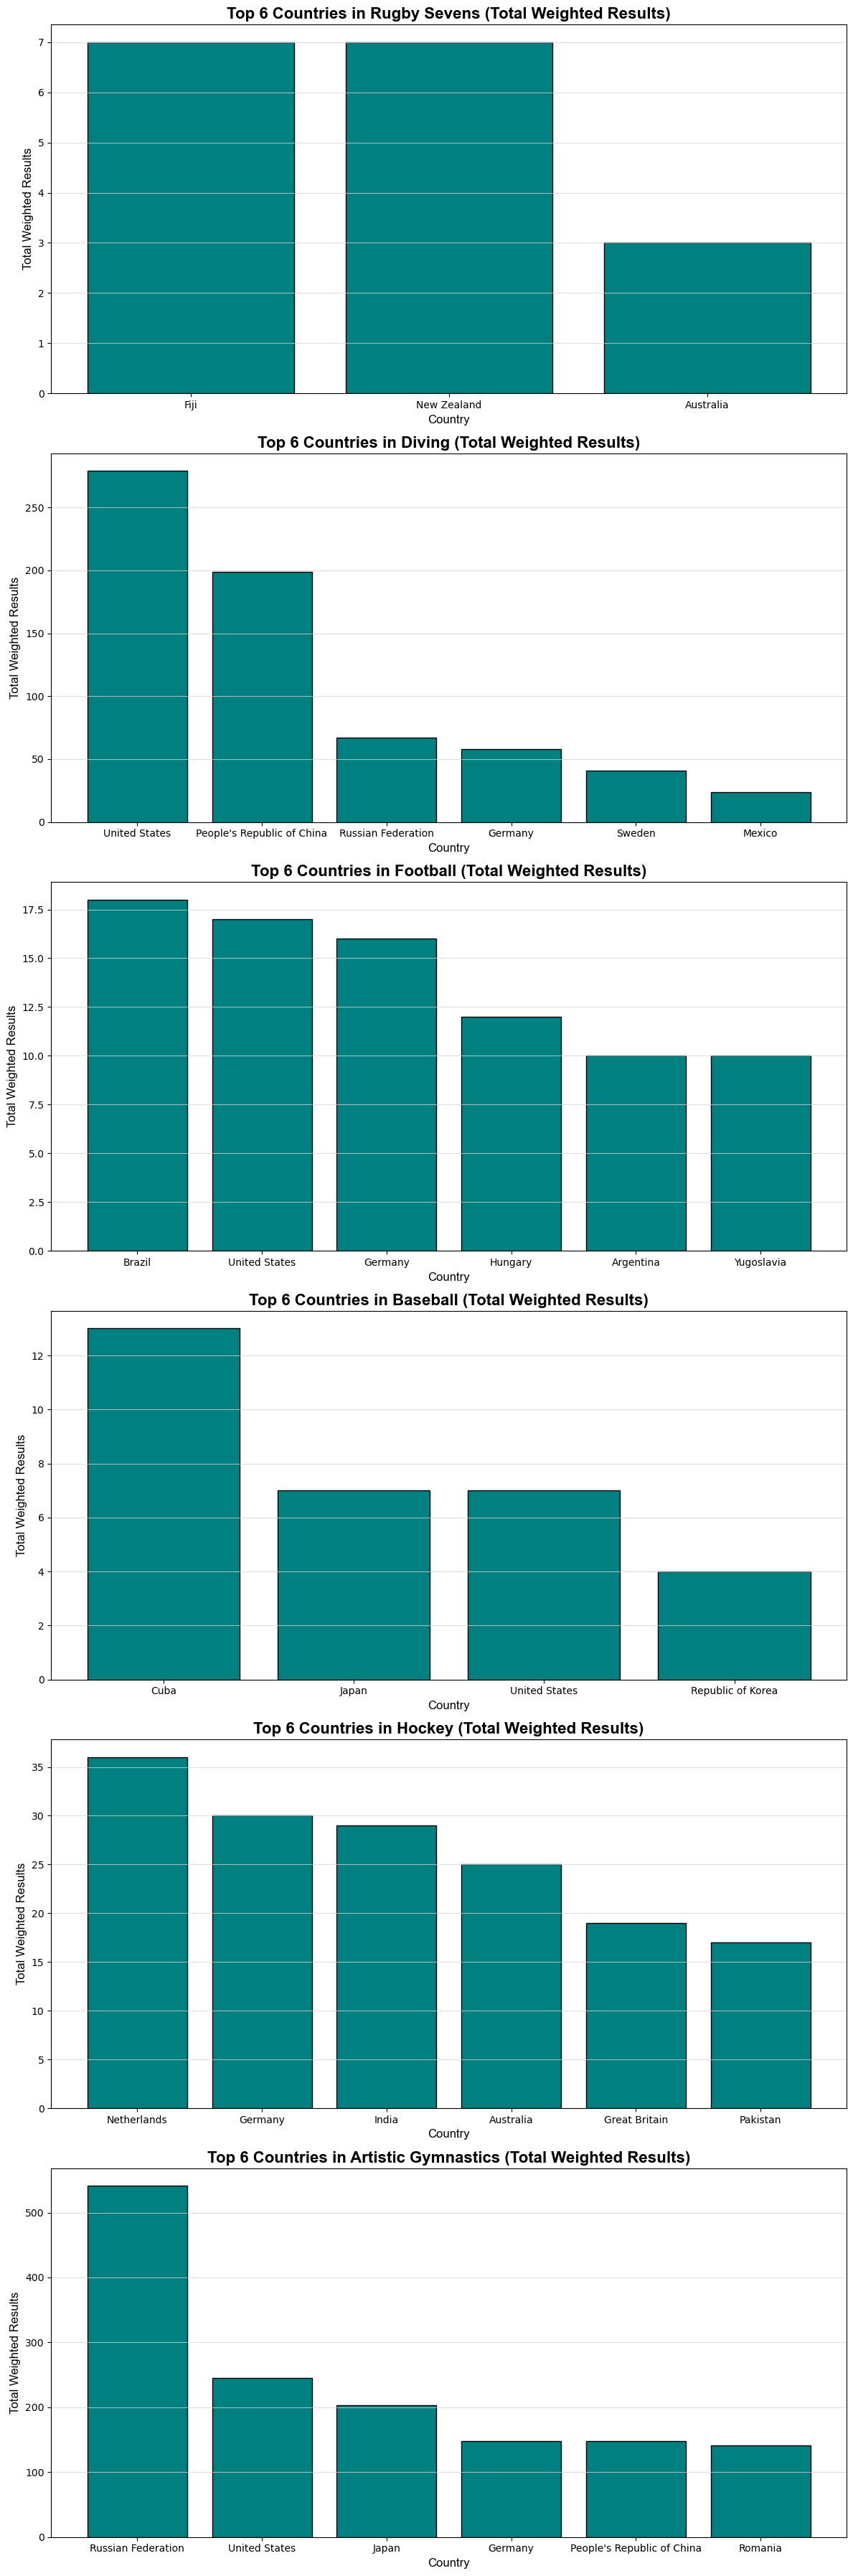

In [26]:
#restrict the plots to only ones that are interesting

# Define the sports of interest
sports_of_interest = ['Rugby Sevens', 'Diving', 'Football', 'Baseball', 'Hockey', 'Artistic Gymnastics']

# Set Canvas Size for the subplots
fig, axes = plt.subplots(len(sports_of_interest), 1, figsize=(12, 6 * len(sports_of_interest)))

# Handle case where there's only one subplot
if len(sports_of_interest) == 1:
    axes = [axes]

# Loop over each sport and plot on a different axis
for i, sport in enumerate(sports_of_interest):
    sport_data = df_sport_country_sum[df_sport_country_sum['sport'] == sport]
    
    # Select the top 6 countries based on 'weighted_results'
    top_6_countries = sport_data.nlargest(6, 'weighted_results')
    
    # Create a bar chart for the top 6 countries
    axes[i].bar(top_6_countries['country'], 
                top_6_countries['weighted_results'], 
                color='teal', 
                edgecolor='black')
    
    # Customizations for each subplot
    axes[i].set_xlabel("Country", fontfamily="Arial", fontsize=12)
    axes[i].set_ylabel("Total Weighted Results", fontfamily="Arial", fontsize=12)
    axes[i].set_title(f"Top 6 Countries in {sport} (Total Weighted Results)", 
                      fontweight="bold", fontsize=16, fontfamily="Arial")
    axes[i].grid(axis='y', linestyle="-", color="lightgrey", alpha=0.75)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

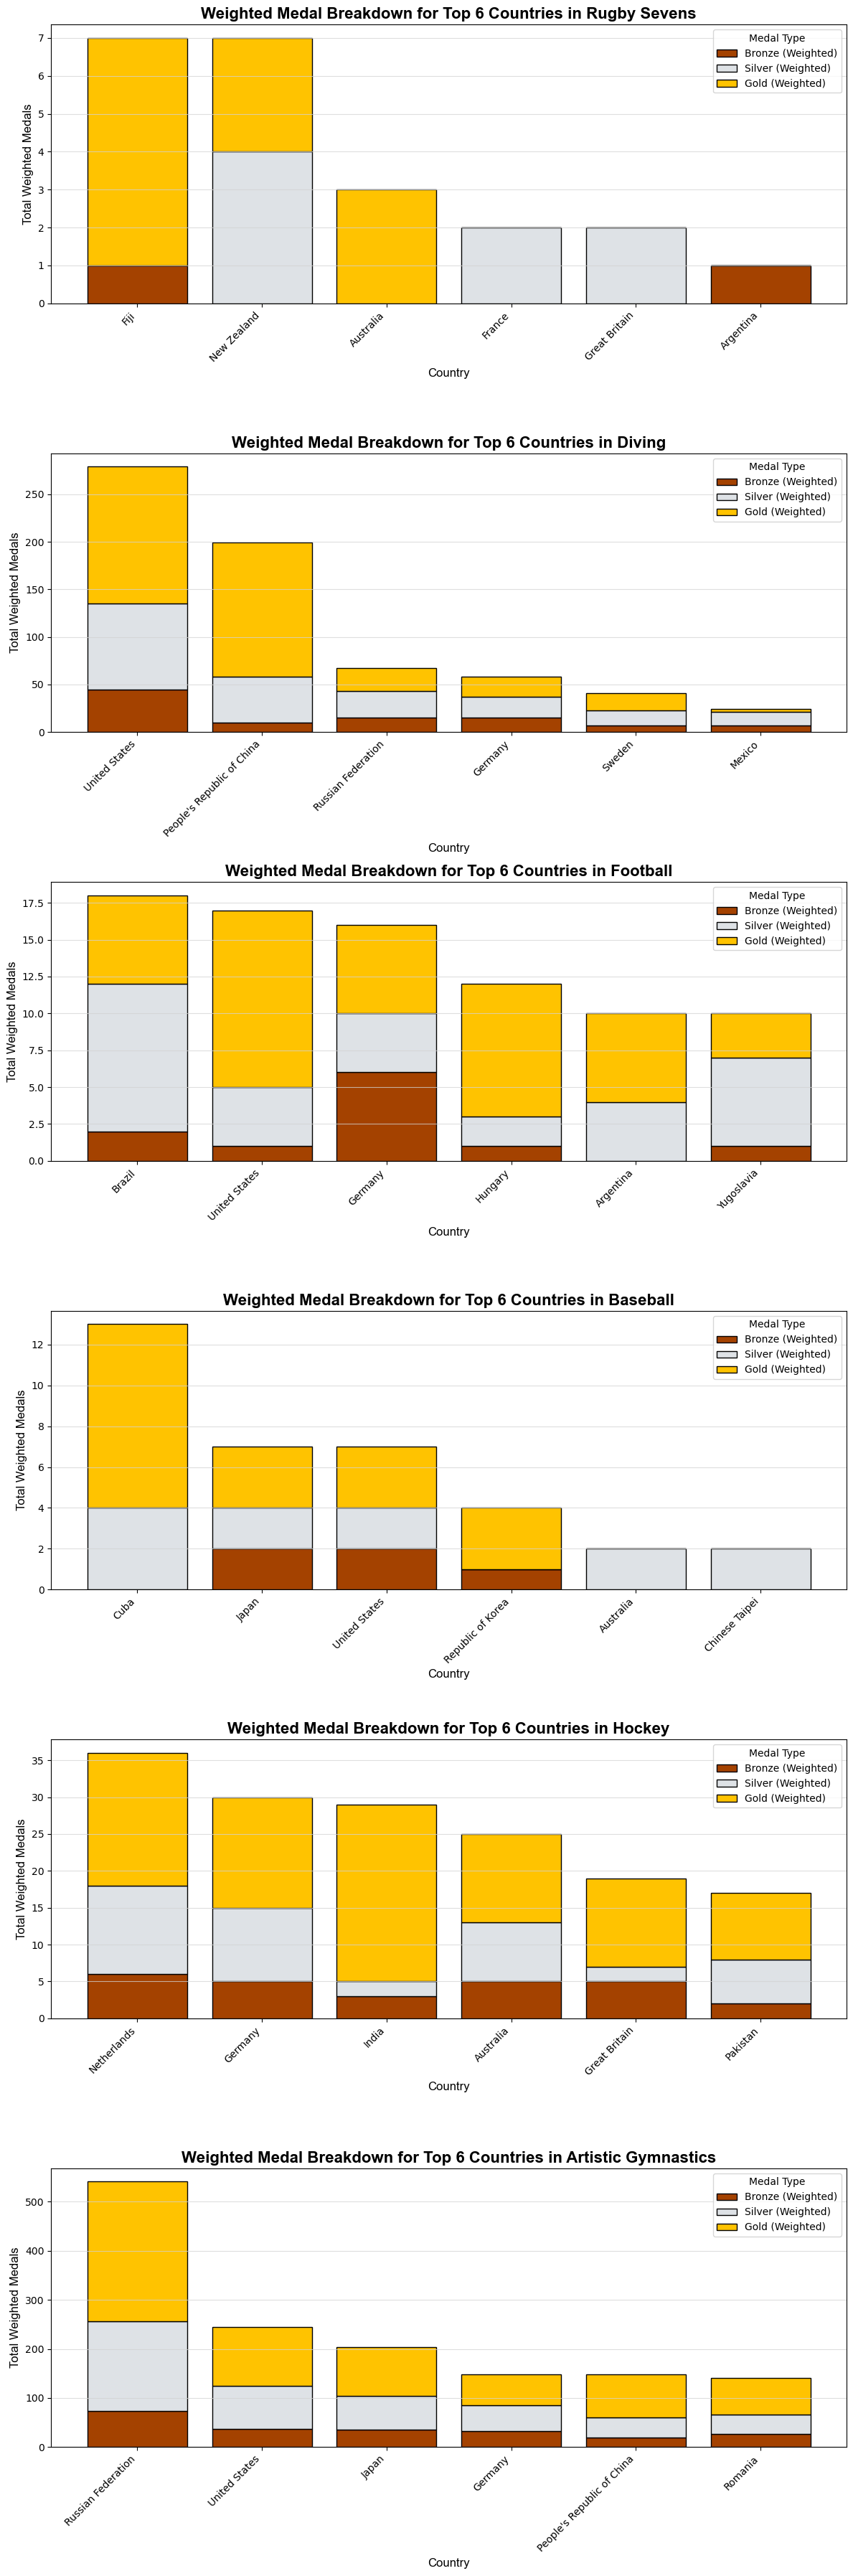

In [25]:
#thank you ChatGPT for adding colors for the different medals

# Define the sports of interest
sports_of_interest = ['Rugby Sevens', 'Diving', 'Football', 'Baseball', 'Hockey', 'Artistic Gymnastics']

# Set Canvas Size for the subplots
fig, axes = plt.subplots(len(sports_of_interest), 1, figsize=(12, 6 * len(sports_of_interest)))

# Handle case where there's only one subplot
if len(sports_of_interest) == 1:
    axes = [axes]

# Define medal weighting
medal_weights = {'gold': 3, 'silver': 2, 'bronze': 1}

# Loop over each sport and plot on a different axis
for i, sport in enumerate(sports_of_interest):
    sport_data = df_country_results[df_country_results['sport'] == sport]
    
    # Aggregate data by country
    aggregated_data = sport_data.groupby('country', as_index=False).sum()
    
    # Calculate total weighted results
    aggregated_data['weighted_total'] = (
        aggregated_data['gold'] * medal_weights['gold'] +
        aggregated_data['silver'] * medal_weights['silver'] +
        aggregated_data['bronze'] * medal_weights['bronze']
    )
    
    # Select the top 6 countries based on total weighted results
    top_6_countries = aggregated_data.nlargest(6, 'weighted_total')

    # Create stacked bar chart using weighted values
    x = np.arange(len(top_6_countries))  # Positions for the bars
    axes[i].bar(x, top_6_countries['bronze'] * medal_weights['bronze'], 
                color='#a44200', label='Bronze (Weighted)', edgecolor='black')
    axes[i].bar(x, top_6_countries['silver'] * medal_weights['silver'], 
                bottom=top_6_countries['bronze'] * medal_weights['bronze'], 
                color='#dee2e6', label='Silver (Weighted)', edgecolor='black')
    axes[i].bar(x, top_6_countries['gold'] * medal_weights['gold'], 
                bottom=(top_6_countries['bronze'] * medal_weights['bronze'] +
                        top_6_countries['silver'] * medal_weights['silver']), 
                color='#ffc300', label='Gold (Weighted)', edgecolor='black')

    # Customize the x-axis with country names
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(top_6_countries['country'], rotation=45, ha='right')
    
    # Customizations for each subplot
    axes[i].set_xlabel("Country", fontfamily="Arial", fontsize=12)
    axes[i].set_ylabel("Total Weighted Medals", fontfamily="Arial", fontsize=12)
    axes[i].set_title(f"Weighted Medal Breakdown for Top 6 Countries in {sport}", 
                      fontweight="bold", fontsize=16, fontfamily="Arial")
    axes[i].legend(loc='upper right', title='Medal Type')
    axes[i].grid(axis='y', linestyle="-", color="lightgrey", alpha=0.75)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()